In [2]:
import spectral 
import numpy as np
import matplotlib.pyplot as plt 
import skimage

In [7]:
hyperim = np.load("../images/sandvika.npy")
wavelength = spectral.envi.read_envi_header('../images/Visnir.hdr')['wavelength']
ww = [float(i) for i in wavelength]

In [78]:

def band_num(desired_ww, ww):
    l_min = 100 # Just a default number
    for ix, w in enumerate(ww):
        l = abs(desired_ww - w) # Finds the difference between desired wavelenght and the actual wavelength
        if l < l_min: # If the difference is smaller than l_min, it overwrites l_min and updates closest_ww
            l_min = l 
            closest_ww = ix
    return closest_ww

bww = band_num(440, ww)
gww = band_num(535, ww)
rww = band_num(645, ww)
nirww = band_num(800, ww)
print(rww, gww, bww, nirww)

75 40 10 123


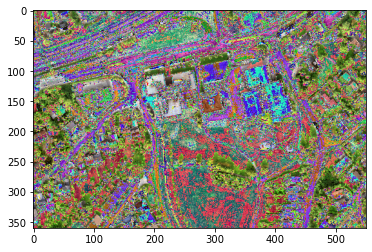

In [79]:
rgb_im = np.zeros((360, 550, 3))
rgb_im[:,:,0] = hyperim[:,:,rww]
rgb_im[:,:,1] = hyperim[:,:,gww]
rgb_im[:,:,2] = hyperim[:,:,bww]

plt.imshow(rgb_im.astype('uint8'))


In [82]:
def compute_ndvi(image, ww):
    rww = band_num(645, ww)
    nirww = band_num(800, ww)
    ndvi = (image[0,0,nirww] - image[0,0,rww])/(image[0,0,nirww] + image[0,0,rww])
    return ndvi

In [83]:
ndvi = compute_ndvi(hyperim, ww)

In [84]:
ndvi

0.8880088